# Relative abundance of prokaryotic MAGs'

## Initialize

In [1]:
library(ggplot2)
library(ggpubr)
library(dplyr)
library(tibble)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
MIN_COMPLETENESS = 20 # MAG threshold

## Load data and process

In [3]:
data = read.table('data/all_sampl_bin3c_res_1_CHECKED_SPECIES.txt',sep ='\t',header = TRUE, stringsAsFactors = FALSE)
all_sampl_bin3c_res = data


In [4]:
options(repr.matrix.max.rows=6, repr.matrix.max.cols=20)

In [5]:
all_sampl_bin3c_res = all_sampl_bin3c_res %>% filter(Taxonomy != "-") %>%
    mutate(Taxonomy = gsub("^g__", "", Taxonomy))
all_sampl_bin3c_res

MAG_ID,Sample,Completeness,Contamination,Abundance,Taxonomy
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
CL02,B2,99.18,1.39,0.5,Pediococcus damnosus
CL03,B2,97.73,5.01,30.6,Lactobacillus acetotolerans
CL001,B14,81.76,9.84,100.0,Lactobacillus acetotolerans
⋮,⋮,⋮,⋮,⋮,⋮
CL004,C33,18.20,0.33,0.9,Tatumella uncl.
CL001,C34,54.21,2.38,7.4,Tatumella uncl.
CL003,C34,12.50,0.00,6.1,Tatumella uncl.


In [6]:
# drop low-complete MAGs
all_sampl_bin3c_res = all_sampl_bin3c_res %>% filter(Completeness > 30)

In [7]:
# renorm to 100% per sample
all_sampl_bin3c_res = all_sampl_bin3c_res %>% group_by(Sample) %>%
    mutate(sum_Abundance = sum(Abundance)) %>%
    ungroup() %>%
    mutate(Abundance = Abundance/sum_Abundance * 100) %>%
    select(-sum_Abundance)
    

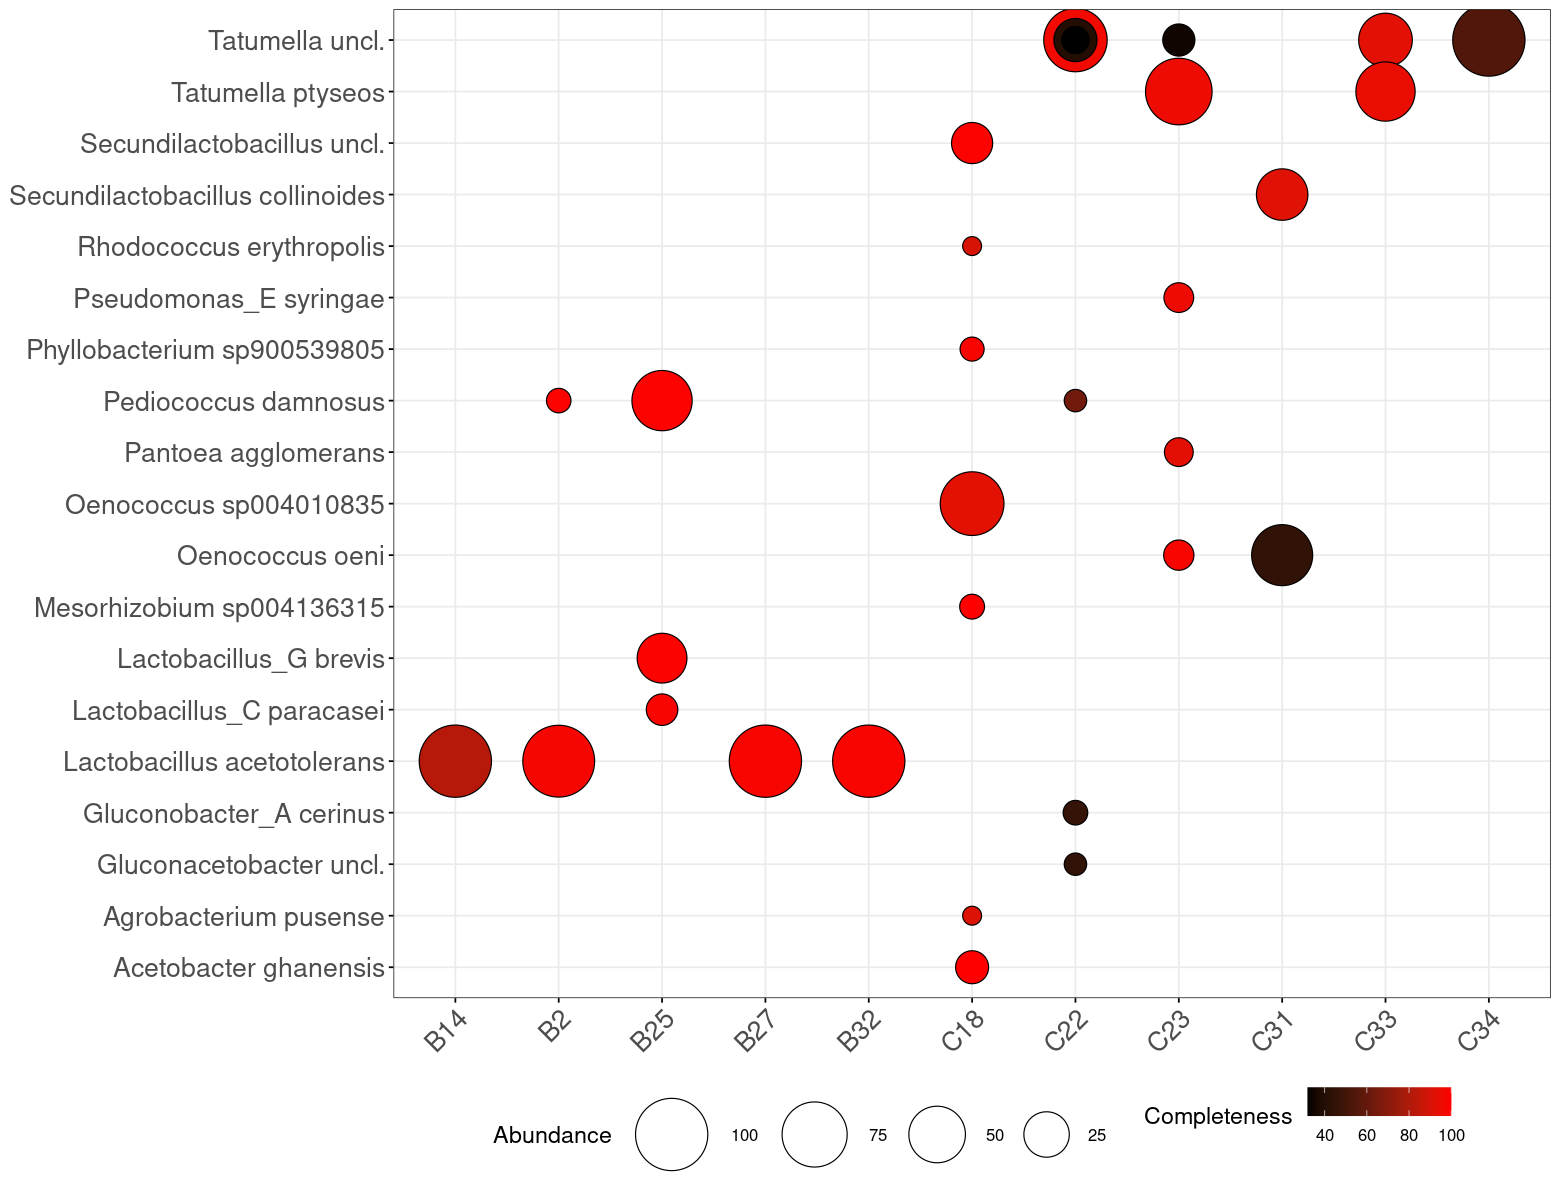

In [8]:
# bubble plot
options(repr.plot.width=13, repr.plot.height=10)
p33 <- ggballoonplot(all_sampl_bin3c_res, 
  x = 'Sample', y = "Taxonomy", size = "Abundance", fill = "Completeness", #shape = shape, 
  size.range = c(5, 20),
  ggtheme = theme_bw()) +  
  #scale_fill_gradient(low="blue", high = "red", limits = c(60, 100), na.value = 'blue') +
  scale_fill_gradient(low="black", high = "red") +
  theme(legend.position="bottom", 
    legend.direction = "horizontal",
    axis.text=element_text(size=16),
    legend.title = element_text(size=14),
    legend.text = element_text(size=10)) #+ 
  #scale_size_continuous(range = c(3, 10))
p33

In [9]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Moscow
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tibble_3.2.1  dplyr_1.1.2   ggpubr_0.6.0  ggplot2_3.4.3

loaded via a namespace (and not attached):
 [1] gtable_0.3.3        jsonlite_1.8.8      compiler_4.3.2     
 [4] ggsignif_0.6.4      crayon_1.5.2   